In [1]:
#----------------------------------------------------------------------------------------#
# Add diffusers path to sys path
import sys
import os
# Get Diffusers path from environment variable
diffusers_path = os.getenv('DIFFUSERS_PATH')
print(f"Diffusers path: {diffusers_path}")
if diffusers_path is None:
    raise ValueError("Please set DIFFUSERS_PATH environment variable to Diffusers path")
sys.path.append(diffusers_path+"/src")
#----------------------------------------------------------------------------------------#

from diffusers import StableDiffusionPipeline
import torch
models = [r'f:\sd_models\ghostmix_v2',
          r'f:\sd_models\aesteticmix',
          r'f:\sd_models\revAnimated_v122',]
device = "cuda"
pipe = StableDiffusionPipeline.from_pretrained(models[1], safety_checker=None)
pipe = pipe.to(device, torch.float16)
# print pytorch version
print(torch.__version__)

Diffusers path: f:/dev/aitnew/diffusers


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


2.0.1


In [2]:
from diffusers import  LMSDiscreteScheduler as Scheduler

scheduler = Scheduler.from_config(pipe.scheduler.config)
pipe.scheduler = scheduler
# print pytorch version
print(torch.__config__.show())
print(torch.backends.cudnn.version())

PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86;-gencode;arch=compute_90,code=sm_90;-gencode;arch=compute_37,code=compute_37
  - CuDNN 8.7
  - Magma 2.5.4
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.8, CUDNN_VERSION=8.7.0, CXX_COMPILER=C:/cb/pytorch_1000000000000/work/tmp_bin/sccache-cl.exe, CXX_FLAGS=/DWIN32 /D_WINDOWS /GR /EH

  0%|          | 0/30 [00:00<?, ?it/s]

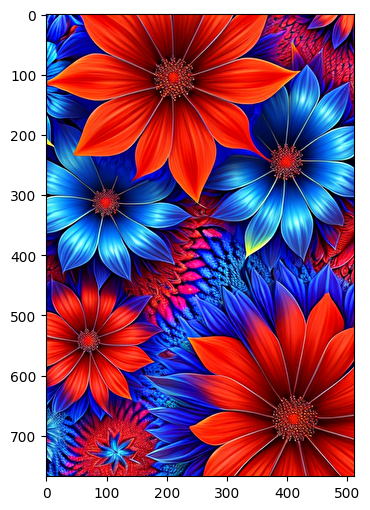

In [4]:
import matplotlib.pyplot as plt
image = pipe("(red and blue flowers wallpaper sharp, crisp, masterpiece, top quality, best quality, official art, beautiful and aesthetic:1.2), extreme detailed,(fractal art:1.3),colorful,highest detailed:1.3"
                        ,num_inference_steps = 30
                        ,height = 768
                        ,width = 512
                        , guidance_scale = 6
                        , negative_prompt = "(worst quality, low quality:2), monochrome, zombie,overexposure, watermark,text,bad anatomy,bad hand,extra hands,extra fingers,too many fingers,fused fingers,bad arm,distorted arm,extra arms,fused arms,extra legs,missing leg,disembodied leg,extra nipples, detached arm, liquid hand,inverted hand,disembodied limb, small breasts, loli, oversized head,extra body,completely nude, extra navel,easynegative,(hair between eyes),sketch, duplicate, ugly, huge eyes, text, logo, worst face, (bad and mutated hands:1.3),  (blurry:2.0), horror, geometry, bad_prompt, (bad hands), (missing fingers), multiple limbs, bad anatomy, (interlocked fingers:1.2), Ugly Fingers, (extra digit and hands and fingers and legs and arms:1.4), ((2girl)), (deformed fingers:1.2), (long fingers:1.2),(bad-artist-anime), bad-artist, bad hand, extra legs ,(ng_deepnegative_v1_75t)"
                        ).images[0]
# save the image
image.save('out.png')

#plot the image
plt.figure(figsize=(4,6))
plt.imshow(image, interpolation="sinc")
plt.show()


In [77]:
import numpy as np
data = np.asarray(image)
print(data.min(),data.max())

0 255
